In [1]:
# Importing libraries to use

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing data
cs_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv", index_col = 0)

## Data Cleaning

In [3]:
# Cleaning data
def cleaning_data (df):
    df.columns = [i.lower().replace(" ", "_") for i in df.columns]
    df.rename(columns = {"employmentstatus": "employment_status"}, inplace = True)
    df = df.drop_duplicates().reset_index()
    df = df.drop(columns = ["index","customer","number_of_open_complaints","vehicle_type","effective_to_date"])
    df = df.dropna()
    return df

In [4]:
def transforming_data (df):
    df=df[df['income'] > 0]
    df["total_claim_amount"] = round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    return df

In [5]:
cs_df = cleaning_data(cs_df)
cs_df = transforming_data(cs_df)

In [6]:
cs_df.head()

state  customer_lifetime_value response  coverage  \
0     Arizona                   4809.0       No     Basic   
2  Washington                  14948.0       No     Basic   
3      Oregon                  22332.0      Yes  Extended   
6  California                   5035.0       No     Basic   
7  California                   4956.0       No     Basic   

              education employment_status gender  income location_code  \
0               College          Employed      M   48029      Suburban   
2              Bachelor          Employed      M   22139      Suburban   
3               College          Employed      M   49078      Suburban   
6                Doctor          Employed      F   37405         Urban   
7  High School or Below          Employed      M   87197         Urban   

  marital_status  ...  months_since_last_claim  months_since_policy_inception  \
0        Married  ...                      7.0                             52   
2         Single  ...                     34.0                             31   
3         Single  ...                     10.0                              3   
6        Married  ...                      8.0                             99   
7         Single  ...                     35.0                             45   

   number_of_policies     policy_type     policy renew_offer_type  \
0                   9  Corporate Auto  Corporate           Offer3   
2                   2   Personal Auto   Personal           Offer3   
3                   2  Corporate Auto  Corporate           Offer2   
6                   4  Corporate Auto  Corporate           Offer2   
7                   3   Personal Auto   Personal           Offer2   

  sales_channel total_claim_amount  vehicle_class vehicle_size  
0         Agent              293.0  Four-Door Car      Medsize  
2   Call Center              480.0            SUV      Medsize  
3        Branch              484.0  Four-Door Car      Medsize  
6        Branch              288.0  Four-Door Car      Medsize  
7        Branch              247.0   Two-Door Car      Medsize  

[5 rows x 21 columns]

In [7]:
cs_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
cs_df.shape

(6817, 21)

In [9]:
# Export cleaned dataframe to .csv

cs_df.to_csv(r'C:\Users\DACA\Desktop\export_dataframe.csv')

## Data exploration / plotting

EDA Categorical columns

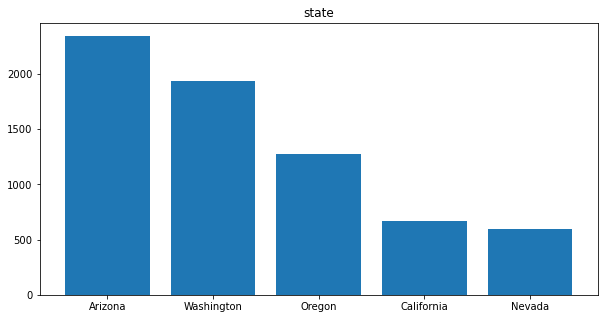

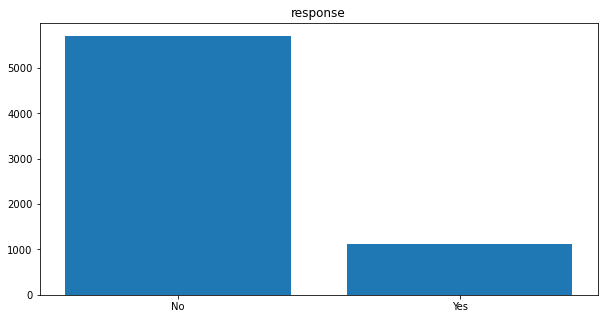

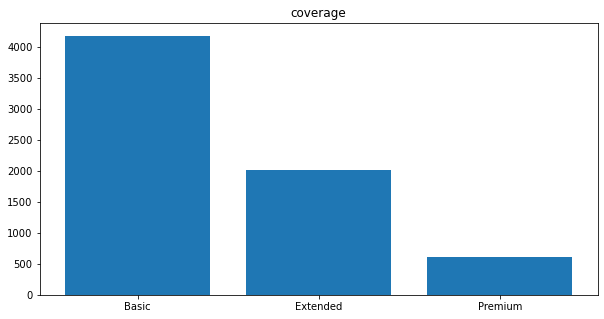

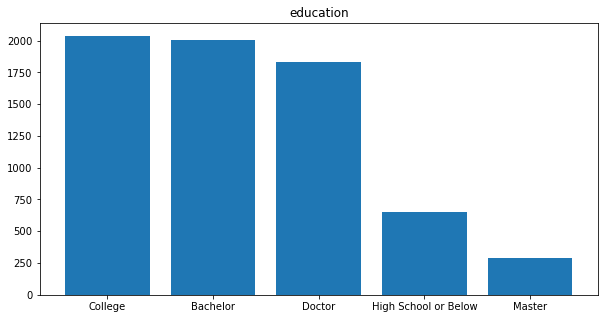

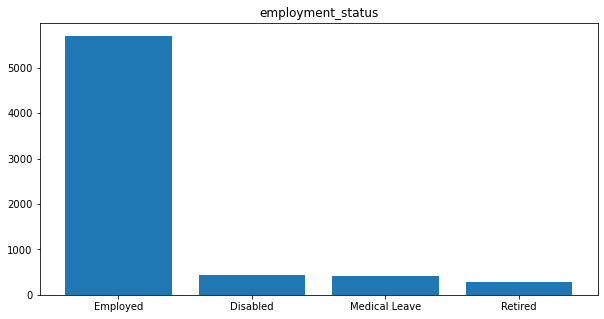

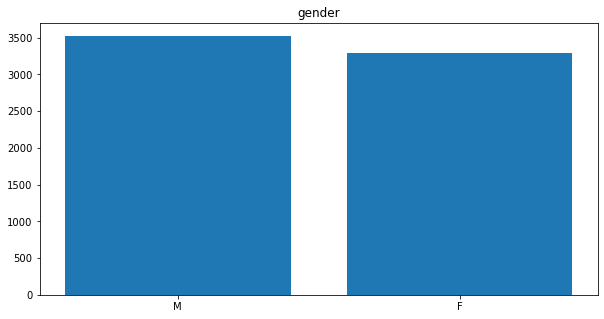

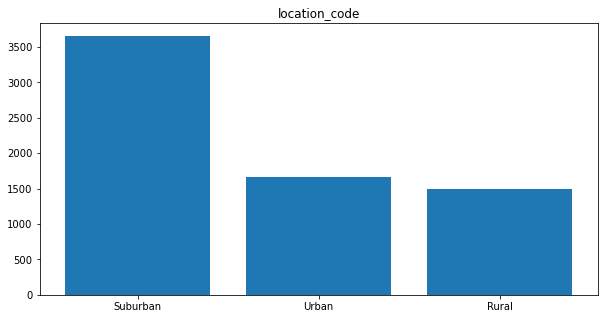

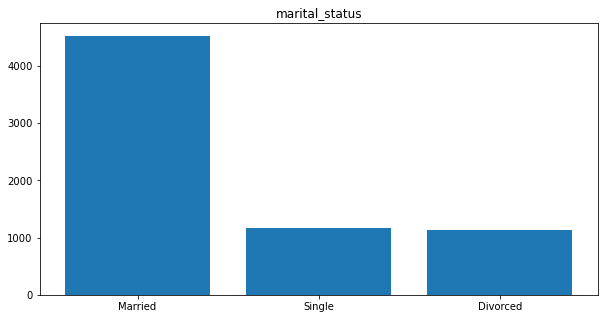

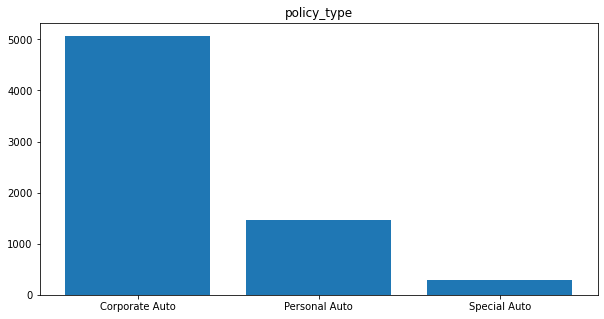

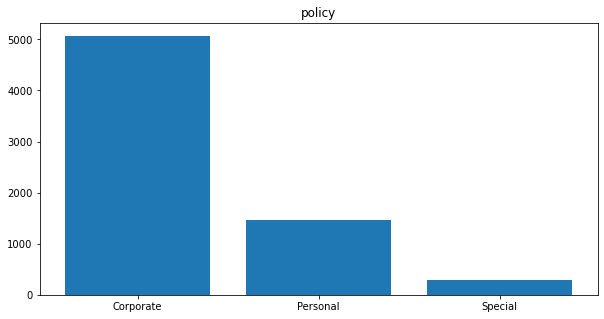

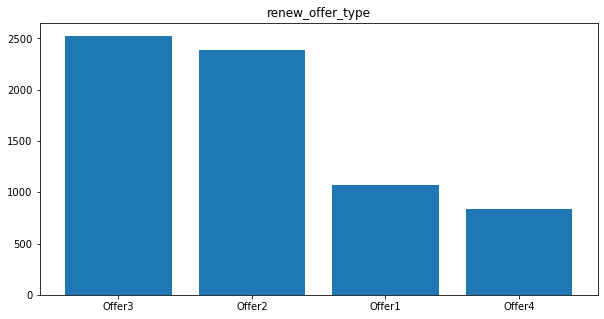

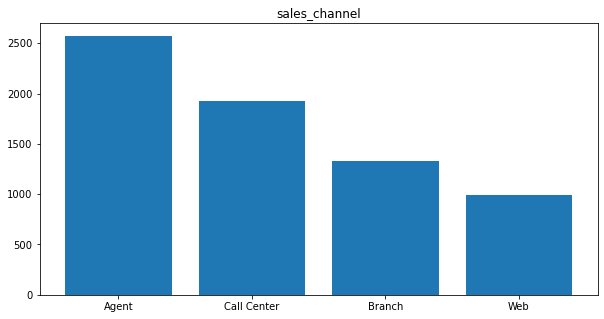

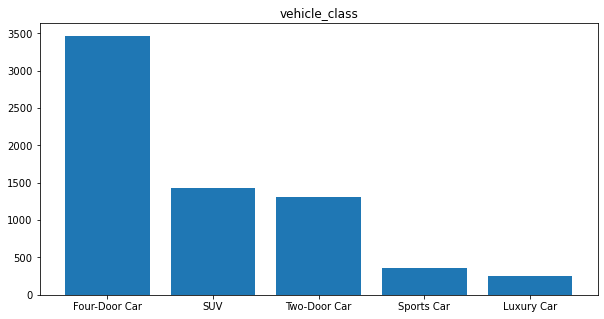

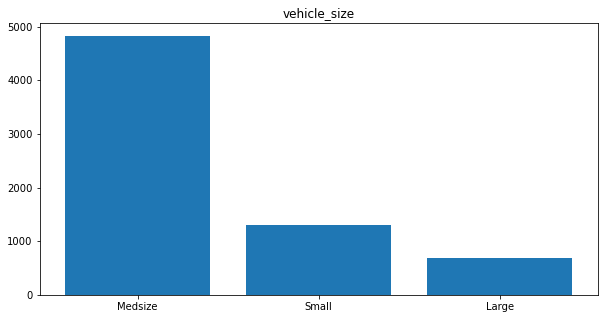

In [10]:
for c in cs_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(cs_df[c].unique(), cs_df[c].value_counts())
    plt.title(c)
    plt.show()

### Show a plot of the total number of responses.

In [11]:
num_responses = cs_df['response'].value_counts()
print(num_responses)

No     5707
Yes    1110
Name: response, dtype: int64


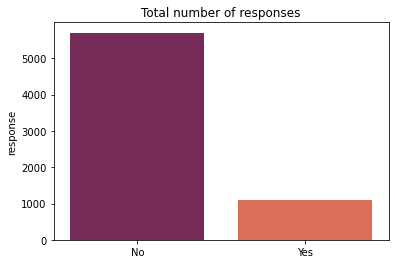

In [12]:
fig, ax = plt.subplots()

ax.set_title("Total number of responses")

sns.barplot(x=num_responses.index, y=num_responses, palette = 'rocket')

plt.show()

### Show response rate by channel.

In [13]:
response_rate = cs_df.groupby(['response', 'sales_channel']).size().reset_index(name= 'count')
print(response_rate)

  response sales_channel  count
0       No         Agent   2021
1       No        Branch   1660
2       No   Call Center   1167
3       No           Web    859
4      Yes         Agent    552
5      Yes        Branch    264
6      Yes   Call Center    162
7      Yes           Web    132


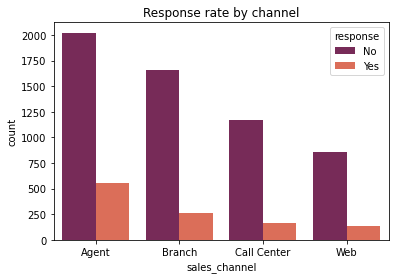

In [14]:
#plot 
    
fig, ax = plt.subplots()

ax.set_title("Response rate by channel")

# seaborn barplot
sns.barplot(x = response_rate['sales_channel'], y = response_rate['count'], hue = response_rate['response'], data = cs_df, palette = "rocket")
plt.show()

### Show a plot of the response rate by the total claim amount.

In [15]:
total_cl_amount = cs_df.groupby(['response','total_claim_amount']).size().reset_index(name = 'count')
print(total_cl_amount)

     response  total_claim_amount  count
0          No                 0.0      3
1          No                 1.0      6
2          No                 2.0      7
3          No                 3.0      9
4          No                 4.0      8
...       ...                 ...    ...
1094      Yes              1261.0      6
1095      Yes              1295.0      6
1096      Yes              1301.0      6
1097      Yes              1325.0      6
1098      Yes              1358.0      6

[1099 rows x 3 columns]


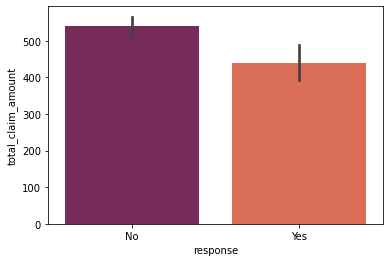

In [16]:
# Plot

sns.barplot(x = total_cl_amount['response'], y = total_cl_amount['total_claim_amount'], palette = 'rocket')
plt.show()

### Show a plot of the response rate by income.

In [17]:
r_income =  cs_df.groupby(['response', 'income']).size().reset_index(name = 'count')
print(r_income)

     response  income  count
0          No   10037      1
1          No   10074      1
2          No   10097      1
3          No   10105      1
4          No   10147      1
...       ...     ...    ...
5697      Yes   95697     12
5698      Yes   96306      6
5699      Yes   97131      6
5700      Yes   97361      6
5701      Yes   99845      6

[5702 rows x 3 columns]


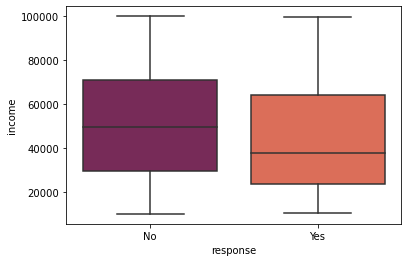

In [18]:
# Plot

sns.boxplot(x = 'response', y = 'income', data = r_income, palette = "rocket")
plt.show()

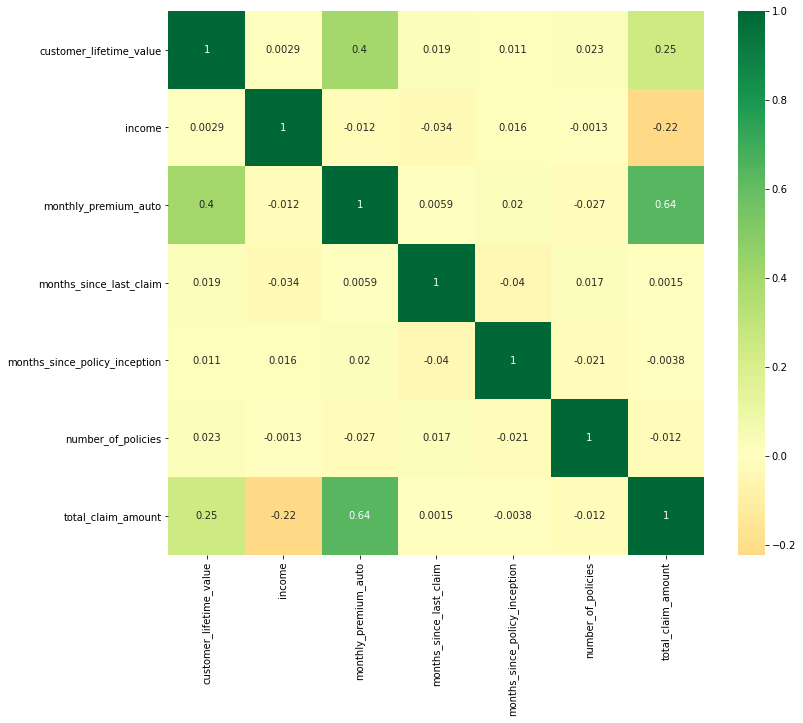

In [19]:
# Correlation heatmap

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(cs_df.corr(),annot=True, ax=ax,  cmap='RdYlGn', center=0)
plt.show()

## Data transformation 

In [20]:
# Getting numerical data

numerical = cs_df.select_dtypes(include = np.number)
print(numerical)

       customer_lifetime_value  income  monthly_premium_auto  \
0                       4809.0   48029                    61   
2                      14948.0   22139                   100   
3                      22332.0   49078                    97   
6                       5035.0   37405                    63   
7                       4956.0   87197                    63   
...                        ...     ...                   ...   
10865                   3579.0   28304                    91   
10866                   2772.0   59855                    74   
10869                   5259.0   61146                    65   
10870                  23893.0   39837                   201   
10871                  11972.0   64195                   158   

       months_since_last_claim  months_since_policy_inception  \
0                          7.0                             52   
2                         34.0                             31   
3                         10.0      

In [21]:
# Getting categorical data

categorical = cs_df.select_dtypes(include = np.object)
print(categorical)

            state response  coverage             education employment_status  \
0         Arizona       No     Basic               College          Employed   
2      Washington       No     Basic              Bachelor          Employed   
3          Oregon      Yes  Extended               College          Employed   
6      California       No     Basic                Doctor          Employed   
7      California       No     Basic  High School or Below          Employed   
...           ...      ...       ...                   ...               ...   
10865  California       No  Extended  High School or Below          Employed   
10866     Arizona       No     Basic               College          Employed   
10869      Oregon       No     Basic               College          Employed   
10870     Arizona       No  Extended              Bachelor          Employed   
10871  California       No   Premium               College          Employed   

      gender location_code marital_stat

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
numerical_scaled = min_max_scaler.fit_transform(numerical)
cs_df_normalized = pd.DataFrame(numerical_scaled)

print(cs_df_normalized)

NameError: name 'preprocessing' is not defined

#### Check the normality of the numerical variables visually.


In [ ]:
sns.displot(cs_df.income, bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.customer_lifetime_value,  bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.monthly_premium_auto, bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.months_since_last_claim, bins = 20)
plt.show()

In [ ]:
sns.displot(cs_df.months_since_policy_inception, bins = 20)
plt.show()

In [ ]:
sns.pairplot(cs_df)
plt.show()

#### For the numerical variables, check the multicollinearity between the features. 

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(numerical.corr(),annot=True, ax=ax,  cmap='RdYlGn', center=0)
plt.show()

## Data processing


### Standardization

#### Categorical variables transformation.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# define example
data = [['Corporate Auto'], ['Personal Auto'], ['Special Auto']]
values = array(data)
print(values)

In [ ]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

In [ ]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

In [ ]:
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

## X-Y-split

In [ ]:
# x-y split - split the target variable from dependant variables

X = cs_df.drop(columns = ['total_claim_amount'])
y = cs_df.total_claim_amount

In [ ]:
# Get the numeric data

numericals_features = X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

In [ ]:
#Standardize
X_scaled = StandardScaler().fit_transform(numericals_features)
X_scaled.shape

In [ ]:
#Get Categorical data

categoricals_features = X.select_dtypes(object)
categoricals_features.head()

Categoricals transformation

In [ ]:
# get dummies pandas
categorical_features = pd.get_dummies(categorical, drop_first=True)

In [ ]:
categorical_features

In [ ]:
# Merging the encoded results into the original data frame

In [ ]:
all_features = pd.concat([numericals_features, categorical_features], axis=1) 
all_features.head()

#### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [ ]:
X_train

### Linear Regression

In [ ]:
model = LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train

y
y_pred = model.predict(X_test.to_numpy())   # model prediction

y_pred_train = model.predict(X_train.to_numpy())

In [ ]:
y_pred

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

#### Model Validation

MSE

In [ ]:
train_mse = mse(y_train,model.predict(X_train.to_numpy()))
test_mse = mse(y_test,model.predict(X_test.to_numpy()))

print('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

RMSE

In [ ]:
print('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

MAE

In [ ]:
print('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

R2

In [ ]:
r2 = model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

In [ ]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

Adjusted R2

In [ ]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

#### Feature importance

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Lab | Comparing regression models

In [ ]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [121]:
# Create training and test sets
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [122]:
X_train

customer_lifetime_value  income  monthly_premium_auto  \
8684                  29050.0   21070                   195   
9929                   3934.0   25927                   103   
948                    3586.0   49080                    91   
2345                   7759.0   96162                    97   
3038                   4985.0   86305                    62   
...                       ...     ...                   ...   
4576                  24128.0   14072                    71   
2456                   4909.0   98693                    61   
276                    5687.0   30242                    72   
6727                   7463.0   70263                    93   
6378                   4682.0   37929                    61   

      months_since_last_claim  months_since_policy_inception  \
8684                      6.0                             47   
9929                      6.0                             20   
948                      14.0                             68   
2345                      9.0                             91   
3038                      1.0                             99   
...                       ...                            ...   
4576                     13.0                              3   
2456                      7.0                             57   
276                      30.0                             23   
6727                     30.0                             66   
6378                     21.0                             35   

      number_of_policies  state_California  state_Nevada  state_Oregon  \
8684                   2                 1             0             0   
9929                   1                 0             0             0   
948                    1                 0             1             0   
2345                   4                 0             1             0   
3038                   5                 1             0             0   
...                  ...               ...           ...           ...   
4576                   2                 0             0             1   
2456                   3                 0             0             1   
276                    3                 0             0             1   
6727                   5                 1             0             0   
6378                   5                 0             0             0   

      state_Washington  ...  renew_offer_type_Offer4  sales_channel_Branch  \
8684                 0  ...                        0                     0   
9929                 1  ...                        0                     0   
948                  0  ...                        0                     0   
2345                 0  ...                        0                     0   
3038                 0  ...                        0                     0   
...                ...  ...                      ...                   ...   
4576                 0  ...                        0                     0   
2456                 0  ...                        0                     0   
276                  0  ...                        0                     1   
6727                 0  ...                        0                     0   
6378                 0  ...                        0                     0   

      sales_channel_Call Center  sales_channel_Web  vehicle_class_Luxury Car  \
8684                          1                  0                         0   
9929                          0                  1                         0   
948                           0                  0                         0   
2345                          0                  0                         0   
3038                          1                  0                         0   
...                         ...                ...                       ...   
4576                          0                  0                         0   
2456          

In [123]:
# Linear Regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.810020578727825
Root Mean Squared Error: 111.52245830896364


In [113]:
# Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
print(f"{lasso.__class__.__name__}: Train -> {lasso.score(X_train, y_train)}, Test -> {lasso.score(X_test, y_test)}")

Lasso: Train -> 0.7987199275510345, Test -> 0.8075466920700106


In [111]:
# Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_score = ridge.score(X_test, y_test)
print("Ridge score: {}".format(ridge_score))

Ridge score: 0.7914078576806275


In [126]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions: {}".format(y_pred))
knn.score(X_test, y_test)

Test set predictions: [ 50. 523. 405. ... 739. 557. 145.]


0.16642228739002932